In [1]:
import warnings
#warnings.filterwarnings("ignore")

import pandas as pd
import string

#nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import tokenize
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer, SentimentIntensityAnalyzer
from nltk.sentiment.util import *

#sci-kit learn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
from sklearn.metrics import (accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc, 
                             mean_squared_error, log_loss, precision_recall_curve, classification_report, 
                             precision_recall_fscore_support)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
#import scikitplot as skplt

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import word2vec

from collections import Counter
import matplotlib.pyplot as plt
plt.ion() 
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

import json


In [2]:
import json

with open('/Users/mohd7/Library/CloudStorage/Box-Box/Sem 4/COMS 579/Project/1/QTL_text.json', 'r') as file:
    data = json.load(file)

In [3]:
data

[{'PMID': '17179536',
  'Journal': 'J Anim Sci. 2007 Jan;85(1):22-30.',
  'Title': 'Variance component analysis of quantitative trait loci for pork carcass composition and meat quality on SSC4 and SSC11.',
  'Abstract': 'In a previous study, QTL for carcass composition and meat quality were identified in a commercial finisher cross. The main objective of the current study was to confirm and fine map the QTL on SSC4 and SSC11 by genotyping an increased number  of individuals and markers and to analyze the data using a combined linkage and linkage disequilibrium analysis method. A modified version of the method excludes linkage disequilibrium information from the analysis, enabling the comparison of  results based on linkage information only or results based on combined linkage and linkage disequilibrium information. Nine additional paternal half-sib families were genotyped for 18 markers, resulting in a total of 1,855 animals genotyped for 15 and 13 markers on SSC4 and SSC11, respective

In [4]:
filtered_data = [i for i in data if i['Category'] == '1']
print(f"Original data length: {len(data)}")
print(f"Filtered data length: {len(filtered_data)}")

Original data length: 11278
Filtered data length: 1007


In [5]:
filtered_data

[{'PMID': '17179536',
  'Journal': 'J Anim Sci. 2007 Jan;85(1):22-30.',
  'Title': 'Variance component analysis of quantitative trait loci for pork carcass composition and meat quality on SSC4 and SSC11.',
  'Abstract': 'In a previous study, QTL for carcass composition and meat quality were identified in a commercial finisher cross. The main objective of the current study was to confirm and fine map the QTL on SSC4 and SSC11 by genotyping an increased number  of individuals and markers and to analyze the data using a combined linkage and linkage disequilibrium analysis method. A modified version of the method excludes linkage disequilibrium information from the analysis, enabling the comparison of  results based on linkage information only or results based on combined linkage and linkage disequilibrium information. Nine additional paternal half-sib families were genotyped for 18 markers, resulting in a total of 1,855 animals genotyped for 15 and 13 markers on SSC4 and SSC11, respective

In [6]:
sentences = []
for doc in filtered_data:
    abstract = doc['Abstract'] 
    sentences.extend(nltk.sent_tokenize(abstract))

print(f"Total number of sentences: {len(sentences)}")

Total number of sentences: 10099


In [7]:
sentences

['In a previous study, QTL for carcass composition and meat quality were identified in a commercial finisher cross.',
 'The main objective of the current study was to confirm and fine map the QTL on SSC4 and SSC11 by genotyping an increased number  of individuals and markers and to analyze the data using a combined linkage and linkage disequilibrium analysis method.',
 'A modified version of the method excludes linkage disequilibrium information from the analysis, enabling the comparison of  results based on linkage information only or results based on combined linkage and linkage disequilibrium information.',
 'Nine additional paternal half-sib families were genotyped for 18 markers, resulting in a total of 1,855 animals genotyped for 15 and 13 markers on SSC4 and SSC11, respectively.',
 'The QTL affecting meat color on SSC4 was confirmed, whereas the QTL affecting LM weight could not be confirmed.',
 'The combined linkage and linkage disequilibrium analysis  resulted in the identific

In [8]:
tokens = []
for sentence in sentences:
    tokens.extend(word_tokenize(sentence))

print(f"Total number of tokens: {len(tokens)}")
print(f"First 20 tokens: {tokens[:40]}")

Total number of tokens: 279184
First 20 tokens: ['In', 'a', 'previous', 'study', ',', 'QTL', 'for', 'carcass', 'composition', 'and', 'meat', 'quality', 'were', 'identified', 'in', 'a', 'commercial', 'finisher', 'cross', '.', 'The', 'main', 'objective', 'of', 'the', 'current', 'study', 'was', 'to', 'confirm', 'and', 'fine', 'map', 'the', 'QTL', 'on', 'SSC4', 'and', 'SSC11', 'by']


In [9]:
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
print(f"\nNumber of sentences: {len(tokenized_sentences)}")
print(f"First sentence tokens: {tokenized_sentences[0]}")


Number of sentences: 10099
First sentence tokens: ['In', 'a', 'previous', 'study', ',', 'QTL', 'for', 'carcass', 'composition', 'and', 'meat', 'quality', 'were', 'identified', 'in', 'a', 'commercial', 'finisher', 'cross', '.']


In [10]:
words_lower = [w.lower() for w in tokens]
words_lower

['in',
 'a',
 'previous',
 'study',
 ',',
 'qtl',
 'for',
 'carcass',
 'composition',
 'and',
 'meat',
 'quality',
 'were',
 'identified',
 'in',
 'a',
 'commercial',
 'finisher',
 'cross',
 '.',
 'the',
 'main',
 'objective',
 'of',
 'the',
 'current',
 'study',
 'was',
 'to',
 'confirm',
 'and',
 'fine',
 'map',
 'the',
 'qtl',
 'on',
 'ssc4',
 'and',
 'ssc11',
 'by',
 'genotyping',
 'an',
 'increased',
 'number',
 'of',
 'individuals',
 'and',
 'markers',
 'and',
 'to',
 'analyze',
 'the',
 'data',
 'using',
 'a',
 'combined',
 'linkage',
 'and',
 'linkage',
 'disequilibrium',
 'analysis',
 'method',
 '.',
 'a',
 'modified',
 'version',
 'of',
 'the',
 'method',
 'excludes',
 'linkage',
 'disequilibrium',
 'information',
 'from',
 'the',
 'analysis',
 ',',
 'enabling',
 'the',
 'comparison',
 'of',
 'results',
 'based',
 'on',
 'linkage',
 'information',
 'only',
 'or',
 'results',
 'based',
 'on',
 'combined',
 'linkage',
 'and',
 'linkage',
 'disequilibrium',
 'information',
 '.',

In [11]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print("NLTK stopwords:", stop_words)
print()

NLTK stopwords: {'but', 'myself', 'him', "didn't", 'for', 'yourself', 'hasn', 'your', 'being', 'did', "should've", 'himself', 'very', "it'd", 'won', 've', 'from', 'o', "you're", 't', 'that', 'aren', 'an', 'how', "i'd", 'mightn', 'after', "don't", "shan't", 'her', 'its', 'wasn', 'this', 'where', 'most', 'hers', 'not', "we'll", 'other', 'i', "doesn't", 'which', 'you', 'once', 'such', 'off', 'when', 'under', 'theirs', "hasn't", 'so', 'over', 'we', "we've", 'ma', 'because', 'has', 'here', 'no', 'isn', 'me', 'any', 'our', 'needn', "weren't", "isn't", 'should', 'having', 'they', 'hadn', 'through', 'was', 'itself', 'more', 'have', 'be', "he'd", "couldn't", "they'll", 'ourselves', 'y', 'during', "aren't", "they've", 'at', 'whom', 'just', 'too', 'some', "wasn't", "i'm", 'as', 'into', "won't", 'shouldn', "she's", 'or', 'and', 'these', 'why', "i've", 'while', "shouldn't", 'before', 'up', 'can', 'ours', 're', 'nor', "you've", 'm', 'his', 'didn', 'in', 'will', 'each', 'to', 'yours', 'she', "that'll

[nltk_data] Downloading package stopwords to /Users/mohd7/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
filtered_words = [w for w in words_lower if w not in stop_words]
print(f"Total number of filtered words: {len(filtered_words)}")
print(f"First 20 filtered words: {filtered_words[:20]}")



Total number of filtered words: 197099
First 20 filtered words: ['previous', 'study', ',', 'qtl', 'carcass', 'composition', 'meat', 'quality', 'identified', 'commercial', 'finisher', 'cross', '.', 'main', 'objective', 'current', 'study', 'confirm', 'fine', 'map']


In [13]:
from nltk.probability import FreqDist
freq_dist = FreqDist(filtered_words)
print("Frequency Distribution:")
print(freq_dist.most_common(10))
print()

Frequency Distribution:
[(',', 11811), ('.', 10100), (')', 6086), ('(', 6039), ('qtl', 2688), ('traits', 1970), ('associated', 1213), ('genes', 1152), ('significant', 1142), ('snps', 1114)]



In [14]:
filtered_words_no_punct = [w for w in filtered_words if w not in string.punctuation]

print(f"Total number of filtered words after removing punctuation: {len(filtered_words_no_punct)}")
print(f"First 20 filtered words (no punctuation): {filtered_words_no_punct[:20]}")

Total number of filtered words after removing punctuation: 159172
First 20 filtered words (no punctuation): ['previous', 'study', 'qtl', 'carcass', 'composition', 'meat', 'quality', 'identified', 'commercial', 'finisher', 'cross', 'main', 'objective', 'current', 'study', 'confirm', 'fine', 'map', 'qtl', 'ssc4']


In [15]:
filtered_words_no_punct

['previous',
 'study',
 'qtl',
 'carcass',
 'composition',
 'meat',
 'quality',
 'identified',
 'commercial',
 'finisher',
 'cross',
 'main',
 'objective',
 'current',
 'study',
 'confirm',
 'fine',
 'map',
 'qtl',
 'ssc4',
 'ssc11',
 'genotyping',
 'increased',
 'number',
 'individuals',
 'markers',
 'analyze',
 'data',
 'using',
 'combined',
 'linkage',
 'linkage',
 'disequilibrium',
 'analysis',
 'method',
 'modified',
 'version',
 'method',
 'excludes',
 'linkage',
 'disequilibrium',
 'information',
 'analysis',
 'enabling',
 'comparison',
 'results',
 'based',
 'linkage',
 'information',
 'results',
 'based',
 'combined',
 'linkage',
 'linkage',
 'disequilibrium',
 'information',
 'nine',
 'additional',
 'paternal',
 'half-sib',
 'families',
 'genotyped',
 '18',
 'markers',
 'resulting',
 'total',
 '1,855',
 'animals',
 'genotyped',
 '15',
 '13',
 'markers',
 'ssc4',
 'ssc11',
 'respectively',
 'qtl',
 'affecting',
 'meat',
 'color',
 'ssc4',
 'confirmed',
 'whereas',
 'qtl',
 'af

In [16]:
from nltk.probability import FreqDist
freq_dist = FreqDist(filtered_words_no_punct)
print("Frequency Distribution:")
print(freq_dist.most_common(10))
print()

Frequency Distribution:
[('qtl', 2688), ('traits', 1970), ('associated', 1213), ('genes', 1152), ('significant', 1142), ('snps', 1114), ('study', 1084), ('gene', 1079), ('association', 998), ('identified', 990)]



In [17]:
filtered_words_no_punct

['previous',
 'study',
 'qtl',
 'carcass',
 'composition',
 'meat',
 'quality',
 'identified',
 'commercial',
 'finisher',
 'cross',
 'main',
 'objective',
 'current',
 'study',
 'confirm',
 'fine',
 'map',
 'qtl',
 'ssc4',
 'ssc11',
 'genotyping',
 'increased',
 'number',
 'individuals',
 'markers',
 'analyze',
 'data',
 'using',
 'combined',
 'linkage',
 'linkage',
 'disequilibrium',
 'analysis',
 'method',
 'modified',
 'version',
 'method',
 'excludes',
 'linkage',
 'disequilibrium',
 'information',
 'analysis',
 'enabling',
 'comparison',
 'results',
 'based',
 'linkage',
 'information',
 'results',
 'based',
 'combined',
 'linkage',
 'linkage',
 'disequilibrium',
 'information',
 'nine',
 'additional',
 'paternal',
 'half-sib',
 'families',
 'genotyped',
 '18',
 'markers',
 'resulting',
 'total',
 '1,855',
 'animals',
 'genotyped',
 '15',
 '13',
 'markers',
 'ssc4',
 'ssc11',
 'respectively',
 'qtl',
 'affecting',
 'meat',
 'color',
 'ssc4',
 'confirmed',
 'whereas',
 'qtl',
 'af

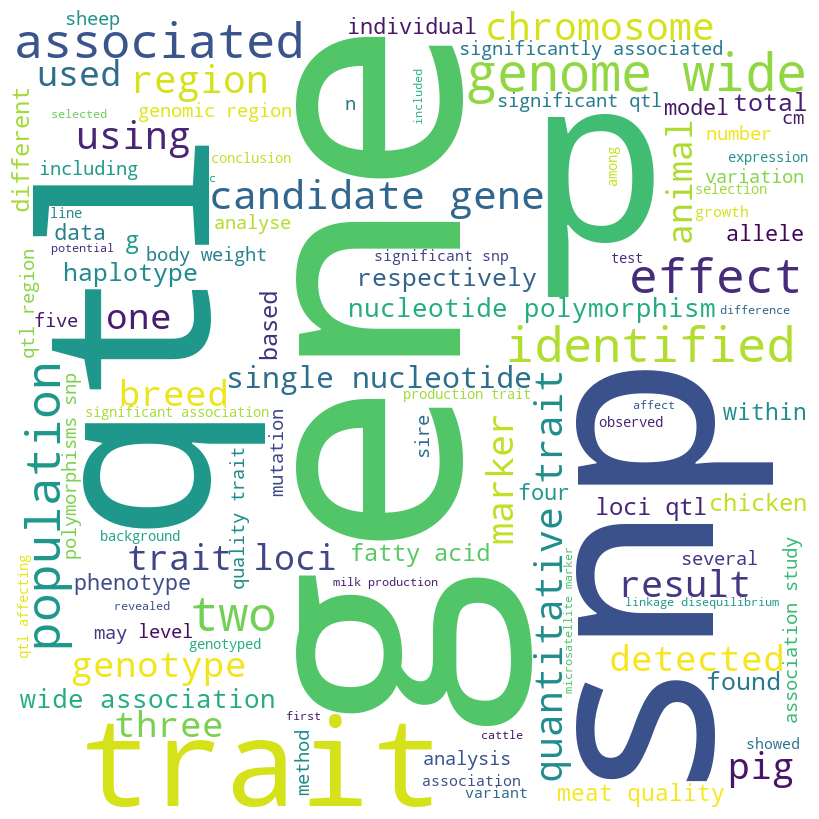

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(filtered_words_no_punct)

wordcloud = WordCloud(width=800, height=800,
                     background_color='white',
                     max_words=100,
                     min_font_size=10).generate(text)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig('wordcloud_frequency.png', dpi=300)
plt.show()

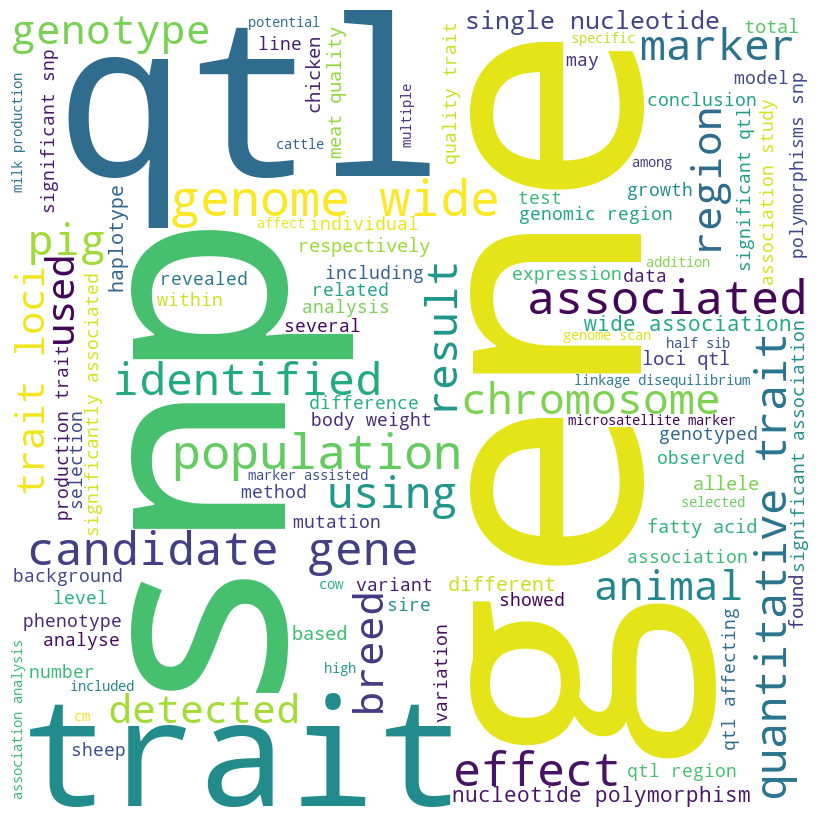

Number of words before cleaning: 159172
Number of words after cleaning: 137462

Sample of removed words:
['fgf2', 'n', '-132', 'rs133498277', '1648', '1447', 'g.3911t', 'arl8a', 'p=0.0488', 'adl328', '1,540', '488', 'kiaa1468', 'c105331a', '23.17-30.73', '14days', 'g.-1557t', '1q32', 'pde3a', 'krtcap3']


In [36]:
def is_valid_word(word):
    # List of number words to remove
    number_words = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten',
                   'first', 'second', 'third', 'fourth', 'fifth', 'sixth', 'seventh', 'eighth', 'ninth', 'tenth']
    
    # Remove if word:
    if (len(word) <= 1 or                     # is too short
        word.isnumeric() or                   # is a number
        re.match(r'^[\d.]+$', word) or        # is a decimal
        re.match(r'^[a-zA-Z]$', word) or      # is a single letter
        re.match(r'.*\d+.*', word) or         # contains any numbers
        word in ['p', 'f', 'n', 'w', 'x'] or  # is a common single letter
        word.lower() in number_words):         # is a number word
        return False
    return True

# Clean the filtered words
cleaned_words = [word for word in filtered_words_no_punct if is_valid_word(word)]

# Join words for word cloud
text = ' '.join(cleaned_words)

# Create and generate word cloud
wordcloud = WordCloud(width=800, height=800,
                     background_color='white',
                     max_words=100,
                     min_font_size=10).generate(text)

# Display the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig('wordcloud_frequency_cleaned.png', dpi=300)
plt.show()

# Print some statistics
print(f"Number of words before cleaning: {len(filtered_words_no_punct)}")
print(f"Number of words after cleaning: {len(cleaned_words)}")
print("\nSample of removed words:")
removed_words = set(filtered_words_no_punct) - set(cleaned_words)
print(list(removed_words)[:20])

NOW for TF-IDF

i just assume to take the abstract as the text for the wordcloud

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
#document-level text for TF-IDF
doc_texts = []
for doc in filtered_data:
    words = word_tokenize(doc['Abstract'].lower())
    clean_words = [w for w in words if w not in string.punctuation and w not in stop_words]
    doc_texts.append(' '.join(clean_words))

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(doc_texts)

feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0).A1

word_tfidf_scores = dict(zip(feature_names, tfidf_scores))



In [27]:
doc_texts

['previous study qtl carcass composition meat quality identified commercial finisher cross main objective current study confirm fine map qtl ssc4 ssc11 genotyping increased number individuals markers analyze data using combined linkage linkage disequilibrium analysis method modified version method excludes linkage disequilibrium information analysis enabling comparison results based linkage information results based combined linkage linkage disequilibrium information nine additional paternal half-sib families genotyped 18 markers resulting total 1,855 animals genotyped 15 13 markers ssc4 ssc11 respectively qtl affecting meat color ssc4 confirmed whereas qtl affecting lm weight could confirmed combined linkage linkage disequilibrium analysis resulted identification new significant effects 14 traits 2 chromosomes heritabilities qtl effects ranged 1.8 13.2 analysis contributed accurate positioning qtl characterized phenotypic effect however results showed even greater marker densities req

In [24]:
feature_names

array(['000', '001', '01', '02', '03', '05', '06', '10', '100', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '49', '50', '54', '56', '60', '62', '70', '80',
       '90', '95', 'aa', 'ab', 'abdominal', 'ability', 'accounted',
       'accuracy', 'acid', 'acids', 'across', 'activity', 'addition',
       'additional', 'additionally', 'additive', 'adg', 'adipose',
       'adjusted', 'affect', 'affected', 'affecting', 'affects', 'age',
       'aim', 'aimed', 'allele', 'alleles', 'allelic', 'allowed', 'along',
       'also', 'alternative', 'although', 'amino', 'among', 'analysed',
       'analyses', 'analysis', 'analyzed', 'and', 'androstenone', 'angus',
       'animal', 'animals', 'another', 'antibody', 'applied', 'approach',
       'approaches', 'approximately', 'architecture', 'area', 'ar

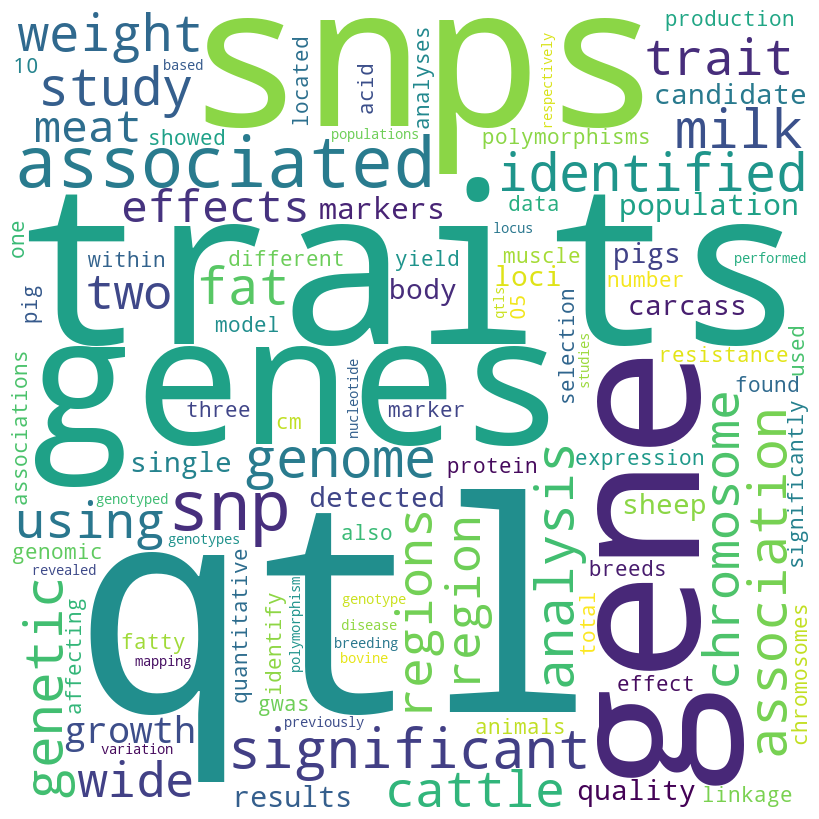

In [25]:
wordcloud_tfidf = WordCloud(width=800, height=800,
                           background_color='white',
                           max_words=100,
                           min_font_size=10).generate_from_frequencies(word_tfidf_scores)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud_tfidf, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig('wordcloud_tfidf.png', dpi=300)
plt.show()

In [28]:
top_words = sorted(word_tfidf_scores.items(), key=lambda x: x[1], reverse=True)[:20]
print("\nTop 20 words by TF-IDF score:")
for word, score in top_words:
    print(f"{word}: {score:.4f}")


Top 20 words by TF-IDF score:
qtl: 86.6959
traits: 57.3183
snps: 45.8404
gene: 40.6121
genes: 39.5476
associated: 39.0017
snp: 38.2852
significant: 35.0257
milk: 33.8707
genome: 33.4531
association: 32.5050
genetic: 32.2704
study: 31.4412
identified: 31.1247
analysis: 31.0159
weight: 30.1827
fat: 30.1138
chromosome: 29.3326
regions: 29.1995
trait: 28.6646


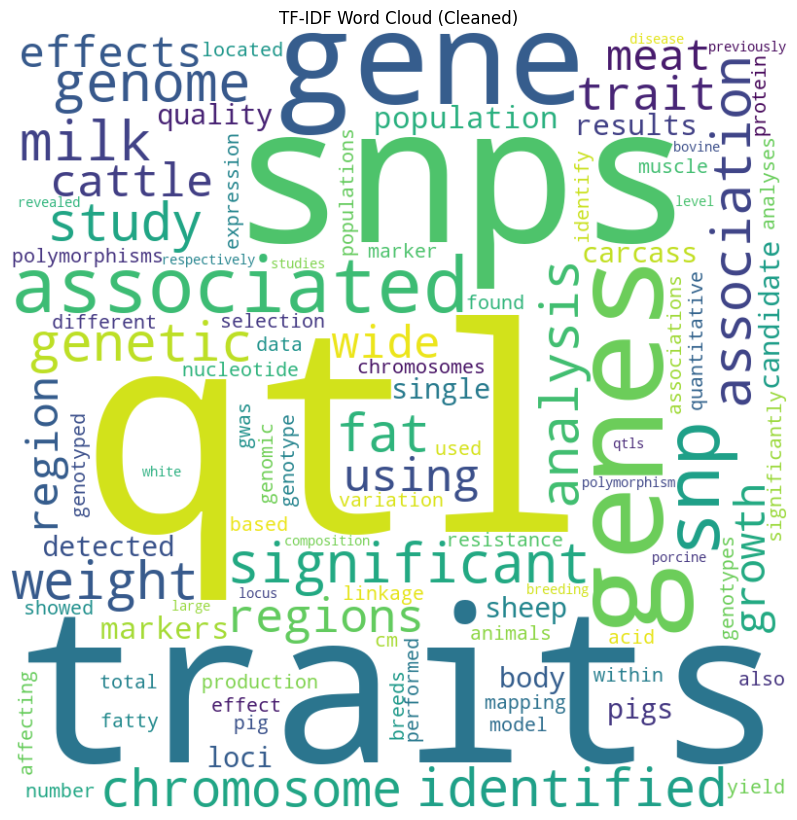


Top 20 words by TF-IDF score:
qtl: 88.0491
traits: 58.0955
snps: 46.2893
gene: 41.0613
genes: 39.7557
associated: 39.2637
snp: 38.0557
significant: 35.5705
genome: 33.7711
milk: 33.7381
association: 32.6241
genetic: 32.4768
study: 31.6825
identified: 31.5912
analysis: 31.1927
weight: 31.0473
fat: 30.7995
chromosome: 29.7324
regions: 29.7026
trait: 28.8310


In [37]:
def is_valid_word(word):
    # List of number words to remove
    number_words = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten',
                   'first', 'second', 'third', 'fourth', 'fifth', 'sixth', 'seventh', 'eighth', 'ninth', 'tenth']
    
    # Remove if word:
    if (len(word) <= 1 or                     # is too short
        word.isnumeric() or                   # is a number
        re.match(r'^[\d.]+$', word) or        # is a decimal
        re.match(r'^[a-zA-Z]$', word) or      # is a single letter
        re.match(r'.*\d+.*', word) or         # contains any numbers
        word in ['p', 'f', 'n', 'w', 'x'] or  # is a common single letter
        word.lower() in number_words):         # is a number word
        return False
    return True

# Clean and prepare document texts for TF-IDF
clean_doc_texts = []
for doc in filtered_data:
    words = word_tokenize(doc['Abstract'].lower())
    clean_words = [w for w in words if w not in string.punctuation 
                  and w not in stop_words 
                  and is_valid_word(w)]
    clean_doc_texts.append(' '.join(clean_words))

# Create and fit TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(clean_doc_texts)

# Get feature names and their TF-IDF scores
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0).A1

# Create dictionary of word: tfidf_score
word_tfidf_scores = dict(zip(feature_names, tfidf_scores))

# Create word cloud from TF-IDF scores
wordcloud_tfidf = WordCloud(width=800, height=800,
                           background_color='white',
                           max_words=100,
                           min_font_size=10).generate_from_frequencies(word_tfidf_scores)

# Display the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud_tfidf, interpolation='bilinear')
plt.axis('off')
plt.title('TF-IDF Word Cloud (Cleaned)')
plt.tight_layout(pad=0)
plt.savefig('wordcloud_tfidf_cleaned.png', dpi=300)
plt.show()

# Print top 20 words by TF-IDF score
print("\nTop 20 words by TF-IDF score:")
top_words = sorted(word_tfidf_scores.items(), key=lambda x: x[1], reverse=True)[:20]
for word, score in top_words:
    print(f"{word}: {score:.4f}")

Task 2
word2vec

In [33]:
from gensim.models import Word2Vec

w2v_sentences = [text.split() for text in doc_texts]

# Train Word2Vec model
w2v_model = Word2Vec(sentences=w2v_sentences,
                    vector_size=100,  # Dimensionality of word vectors
                    window=5,         # Maximum distance between current and predicted word
                    min_count=10,     # Ignore words that appear less than this
                    workers=4)        # Number of CPU threads to use


# Get top 10 words by TF-IDF score
top_tfidf_words = sorted(word_tfidf_scores.items(), key=lambda x: x[1], reverse=True)[:10]

print("Most similar words for top 10 TF-IDF terms:\n")
for word, score in top_tfidf_words:
    print(f"\nTop 20 words similar to '{word}' (TF-IDF score: {score:.4f}):")
    try:
        similar_words = w2v_model.wv.most_similar(word, topn=20)
        for similar_word, similarity in similar_words:
            print(f"{similar_word}: {similarity:.4f}")
    except KeyError:
        print(f"Word '{word}' not in vocabulary (might be too rare)")
    print("-" * 50)

Most similar words for top 10 TF-IDF terms:


Top 20 words similar to 'qtl' (TF-IDF score: 86.6959):
qtls: 0.9671
locus: 0.9258
previously: 0.9221
mapped: 0.9162
regions: 0.8863
reported: 0.8850
loci: 0.8796
detected: 0.8778
chromosomal: 0.8688
endocrine: 0.8668
harbouring: 0.8652
trait: 0.8552
harboring: 0.8550
quantitative: 0.8497
identified: 0.8444
7.: 0.8407
putative: 0.8250
one: 0.8215
affecting: 0.8201
chromosome: 0.8105
--------------------------------------------------

Top 20 words similar to 'traits' (TF-IDF score: 57.3183):
meat: 0.9407
growth: 0.9387
production: 0.9282
important: 0.9240
economically: 0.9143
carcass: 0.8968
related: 0.8898
beef: 0.8874
quality: 0.8852
composition: 0.8779
bone: 0.8779
fatness: 0.8778
eggshell: 0.8585
efficiency: 0.8564
affect: 0.8511
background: 0.8492
performance: 0.8491
understanding: 0.8484
pork: 0.8476
role: 0.8447
--------------------------------------------------

Top 20 words similar to 'snps' (TF-IDF score: 45.8404):
snp: 0.9643
assoc

This is task 3

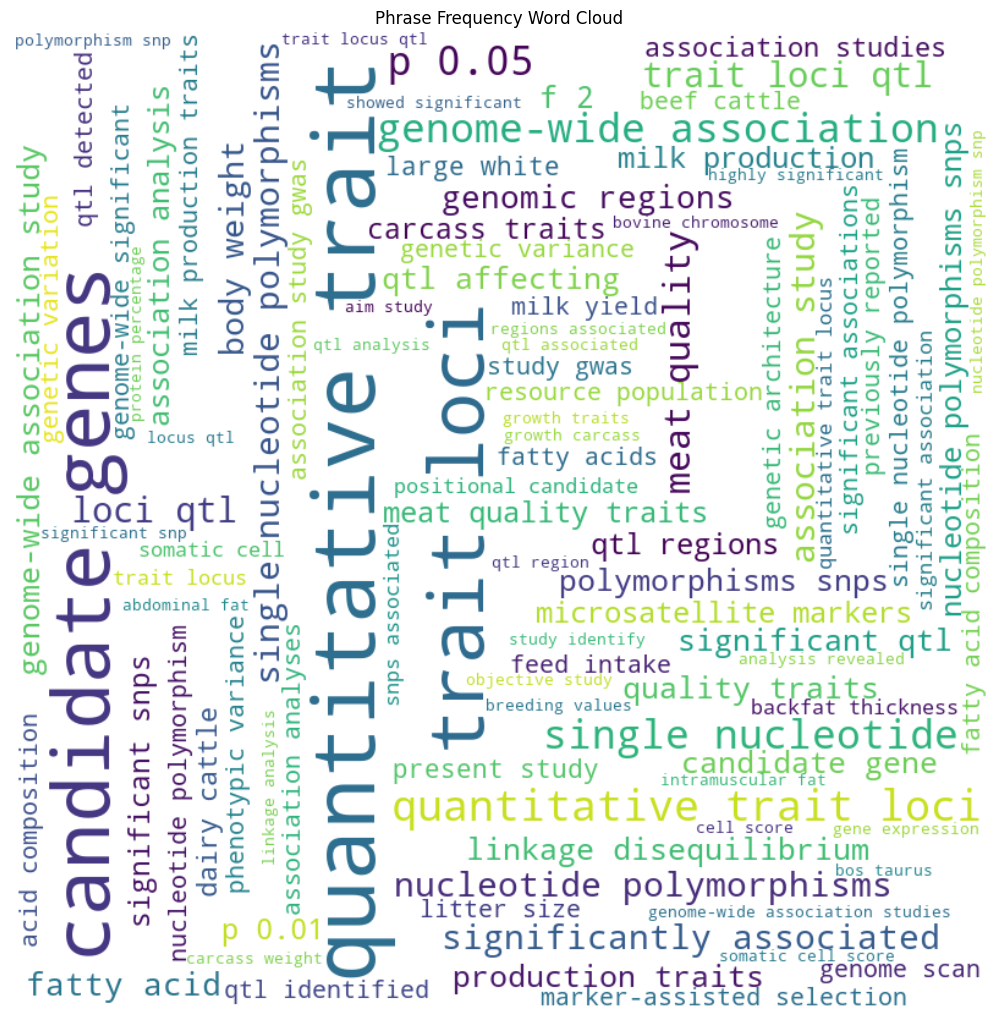

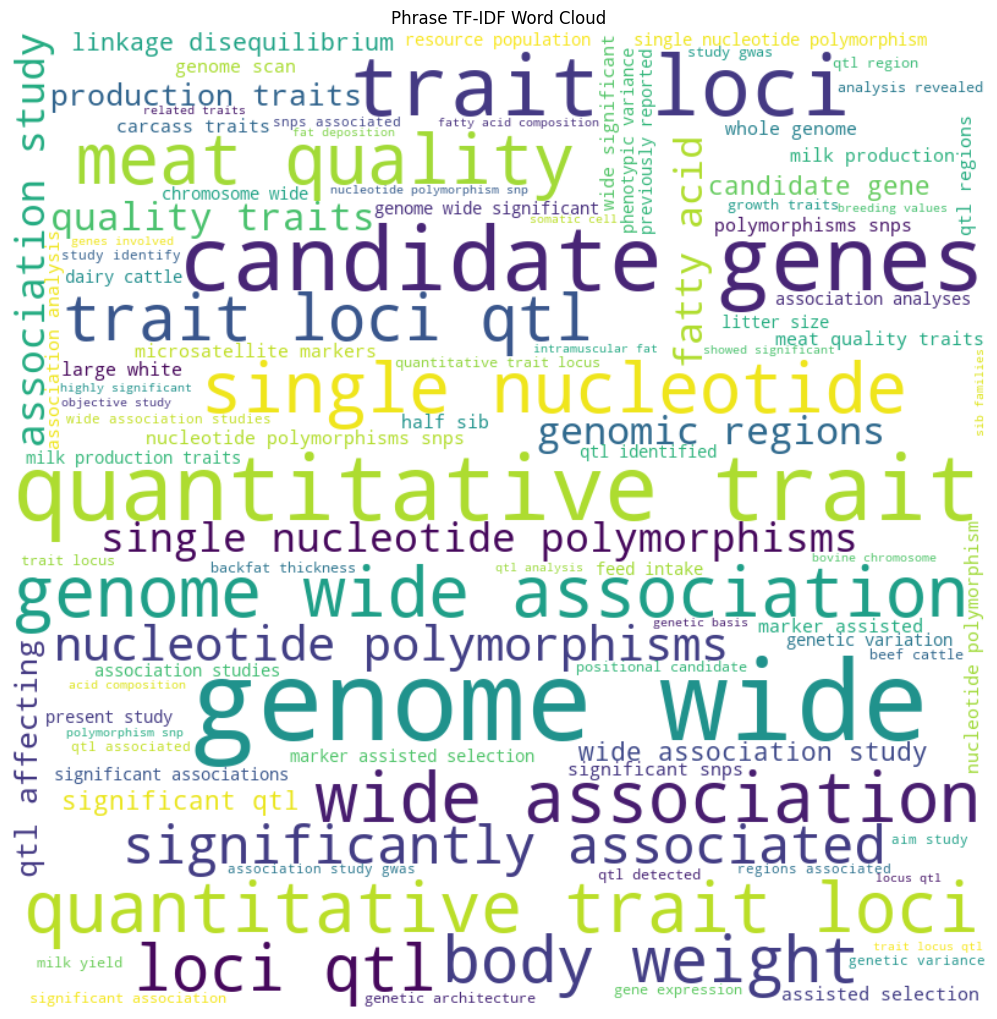


Top 20 phrases by frequency:
quantitative trait: 425
candidate genes: 354
trait loci: 337
quantitative trait loci: 334
single nucleotide: 295
genome-wide association: 293
p 0.05: 289
meat quality: 240
loci qtl: 231
trait loci qtl: 230
significantly associated: 207
association study: 206
nucleotide polymorphisms: 200
single nucleotide polymorphisms: 200
body weight: 184
fatty acid: 176
genomic regions: 176
quality traits: 168
significant qtl: 162
production traits: 158

Top 20 phrases by TF-IDF score:
genome wide: 39.2900
quantitative trait: 29.5135
candidate genes: 28.5477
trait loci: 25.6783
quantitative trait loci: 25.5741
single nucleotide: 25.3451
meat quality: 25.3079
wide association: 25.0110
genome wide association: 24.8710
body weight: 20.3159
loci qtl: 19.9727
trait loci qtl: 19.8972
significantly associated: 19.7759
nucleotide polymorphisms: 19.5229
single nucleotide polymorphisms: 19.5229
association study: 19.4257
genomic regions: 18.6876
fatty acid: 18.5829
quality traits

In [30]:
from nltk import ngrams
from collections import Counter

def get_ngrams(text, n):
    tokens = text.split()
    return [' '.join(gram) for gram in ngrams(tokens, n)]

bigrams = []
trigrams = []
for text in doc_texts:
    bigrams.extend(get_ngrams(text, 2))
    trigrams.extend(get_ngrams(text, 3))

phrases = bigrams + trigrams
phrase_freq = Counter(phrases)

wordcloud_phrases = WordCloud(width=800, height=800,
                            background_color='white',
                            max_words=100,
                            min_font_size=10,
                            collocations=True).generate_from_frequencies(phrase_freq)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_phrases, interpolation='bilinear')
plt.axis('off')
plt.title('Phrase Frequency Word Cloud')
plt.tight_layout(pad=0)
plt.savefig('wordcloud_phrases_freq.png', dpi=300)
plt.show()

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_phrase_vectorizer = TfidfVectorizer(
    max_features=1000,
    ngram_range=(2, 3),
    min_df=2
)

tfidf_phrase_matrix = tfidf_phrase_vectorizer.fit_transform(doc_texts)

phrase_features = tfidf_phrase_vectorizer.get_feature_names_out()
phrase_scores = tfidf_phrase_matrix.sum(axis=0).A1

phrase_tfidf_scores = dict(zip(phrase_features, phrase_scores))

wordcloud_phrases_tfidf = WordCloud(width=800, height=800,
                                  background_color='white',
                                  max_words=100,
                                  min_font_size=10,
                                  collocations=True).generate_from_frequencies(phrase_tfidf_scores)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_phrases_tfidf, interpolation='bilinear')
plt.axis('off')
plt.title('Phrase TF-IDF Word Cloud')
plt.tight_layout(pad=0)
plt.savefig('wordcloud_phrases_tfidf.png', dpi=300)
plt.show()


print("\nTop 20 phrases by frequency:")
for phrase, freq in phrase_freq.most_common(20):
    print(f"{phrase}: {freq}")

print("\nTop 20 phrases by TF-IDF score:")
top_phrases = sorted(phrase_tfidf_scores.items(), key=lambda x: x[1], reverse=True)[:20]
for phrase, score in top_phrases:
    print(f"{phrase}: {score:.4f}")

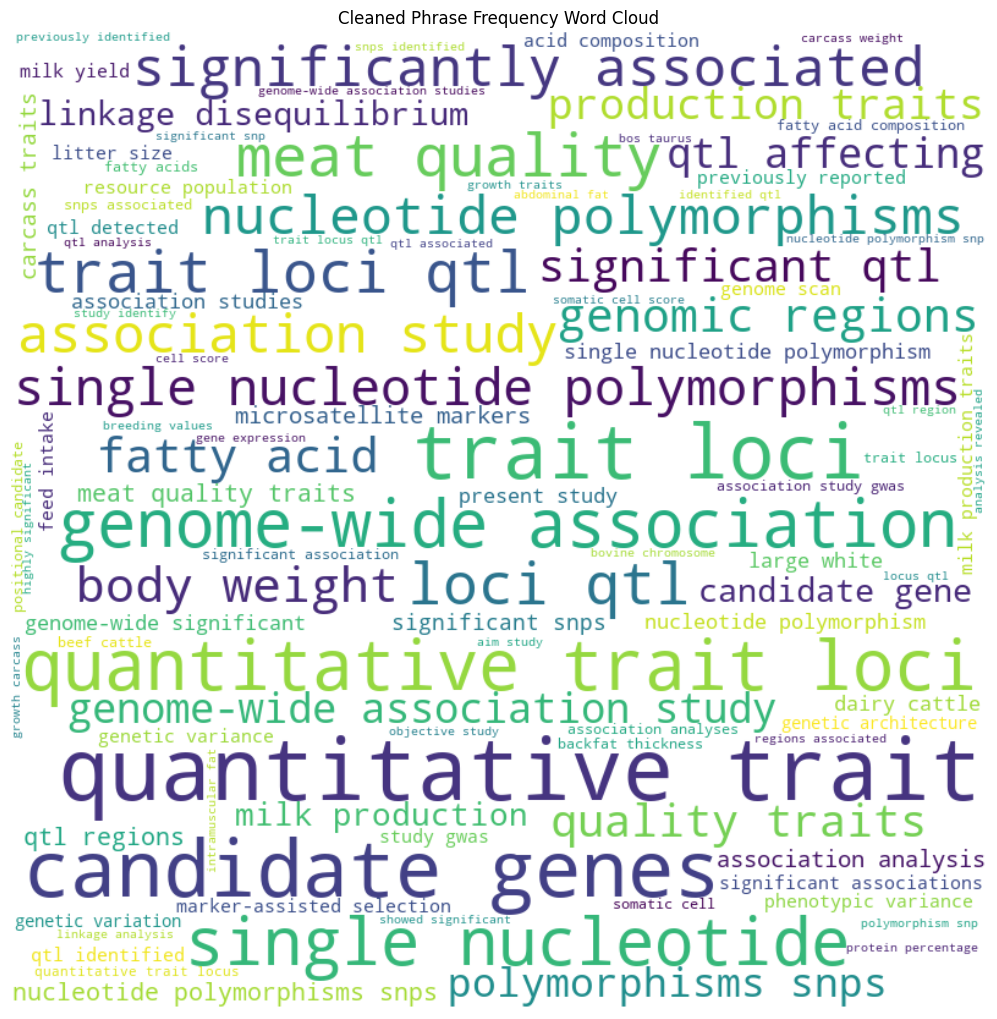

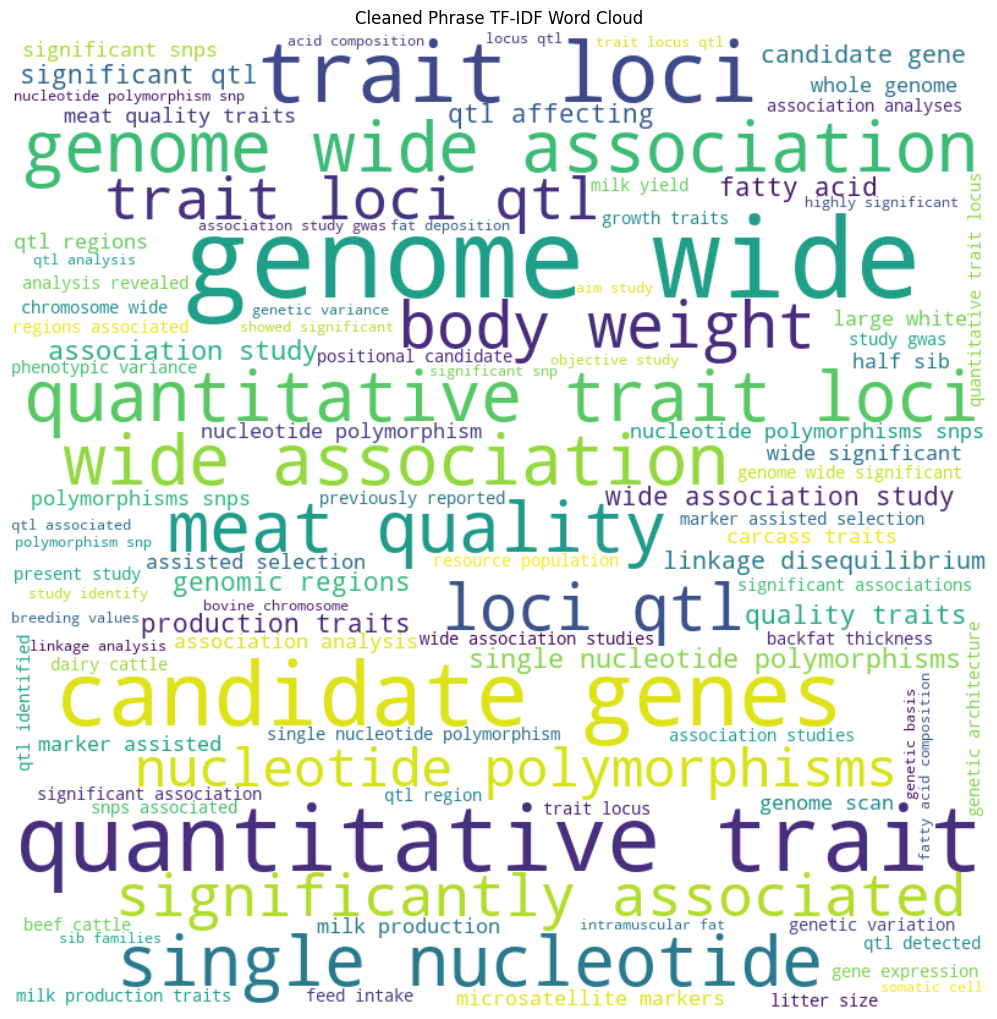


Top 20 cleaned phrases by frequency:
quantitative trait: 425
candidate genes: 354
trait loci: 337
quantitative trait loci: 334
single nucleotide: 295
genome-wide association: 293
meat quality: 240
loci qtl: 231
trait loci qtl: 230
significantly associated: 214
association study: 206
nucleotide polymorphisms: 200
single nucleotide polymorphisms: 200
body weight: 184
fatty acid: 176
genomic regions: 176
quality traits: 168
significant qtl: 164
production traits: 158
genome-wide association study: 158

Top 20 cleaned phrases by TF-IDF score:
genome wide: 39.0882
quantitative trait: 29.8333
candidate genes: 28.2624
trait loci: 25.9611
quantitative trait loci: 25.8574
single nucleotide: 25.4572
meat quality: 25.3355
wide association: 25.0474
genome wide association: 24.9074
body weight: 20.5296
loci qtl: 20.4386
significantly associated: 20.3345
trait loci qtl: 20.2248
nucleotide polymorphisms: 19.6385
single nucleotide polymorphisms: 19.6385
association study: 19.5237
fatty acid: 18.5174


In [34]:
def is_valid_word(word):
    # Remove if word:
    if (len(word) <= 1 or                     # is too short
        word.isnumeric() or                   # is a number
        re.match(r'^[\d.]+$', word) or        # is a decimal
        re.match(r'^[a-zA-Z]$', word) or      # is a single letter
        re.match(r'^[a-zA-Z]\d+$', word) or   # is a letter followed by numbers
        re.match(r'^\d+[a-zA-Z]$', word)):    # is a number followed by letter
        return False
    return True

# Clean the document texts
clean_doc_texts = []
for text in doc_texts:
    words = text.split()
    cleaned = ' '.join([word for word in words if is_valid_word(word)])
    clean_doc_texts.append(cleaned)

# 1. Create frequency-based word cloud
bigrams = []
trigrams = []
for text in clean_doc_texts:
    bigrams.extend(get_ngrams(text, 2))
    trigrams.extend(get_ngrams(text, 3))

phrases = bigrams + trigrams
phrase_freq = Counter(phrases)

wordcloud_phrases = WordCloud(width=800, height=800,
                            background_color='white',
                            max_words=100,
                            min_font_size=10,
                            collocations=True).generate_from_frequencies(phrase_freq)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_phrases, interpolation='bilinear')
plt.axis('off')
plt.title('Cleaned Phrase Frequency Word Cloud')
plt.tight_layout(pad=0)
plt.savefig('wordcloud_phrases_freq_cleaned.png', dpi=300)
plt.show()

# 2. Create TF-IDF based word cloud
tfidf_phrase_vectorizer = TfidfVectorizer(
    max_features=1000,
    ngram_range=(2, 3),
    min_df=2
)

tfidf_phrase_matrix = tfidf_phrase_vectorizer.fit_transform(clean_doc_texts)

phrase_features = tfidf_phrase_vectorizer.get_feature_names_out()
phrase_scores = tfidf_phrase_matrix.sum(axis=0).A1

phrase_tfidf_scores = dict(zip(phrase_features, phrase_scores))

wordcloud_phrases_tfidf = WordCloud(width=800, height=800,
                                  background_color='white',
                                  max_words=100,
                                  min_font_size=10,
                                  collocations=True).generate_from_frequencies(phrase_tfidf_scores)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_phrases_tfidf, interpolation='bilinear')
plt.axis('off')
plt.title('Cleaned Phrase TF-IDF Word Cloud')
plt.tight_layout(pad=0)
plt.savefig('wordcloud_phrases_tfidf_cleaned.png', dpi=300)
plt.show()

# Print top phrases
print("\nTop 20 cleaned phrases by frequency:")
for phrase, freq in phrase_freq.most_common(20):
    print(f"{phrase}: {freq}")

print("\nTop 20 cleaned phrases by TF-IDF score:")
top_phrases = sorted(phrase_tfidf_scores.items(), key=lambda x: x[1], reverse=True)[:20]
for phrase, score in top_phrases:
    print(f"{phrase}: {score:.4f}")

In [39]:
trait_terms = set()
with open("Project/1/Trait dictionary.txt", "r", encoding="utf-8") as f:
    for line in f:
        trait = line.strip().lower()
        if trait:  # Skip empty lines
            trait_terms.add(trait)

In [41]:
trait_terms

{'natural killer t lymphocyte morphology',
 'ovary morphology',
 'milk arachidic acid amount',
 'brain type ii spike-wave activity rate',
 'brain weight',
 'delaminated enamel',
 'medullary cavity development trait',
 'neurite',
 'age of onset of ean',
 'blood vasopressin',
 'immune system cell quantity',
 'bronchoalveolar duct junction morphology',
 'ventricular septum morphology',
 'blood estrogen level',
 'retinal pigment epithelium',
 'ammon horn',
 't cell apoptosis trait',
 'hassal body morphology trait',
 'learning/memory trait',
 'ovarian folliculogenesis trait',
 'single islet of langerhans',
 'primary auditory area morphology',
 'heart left ventricle morphological measurement',
 'experimental autoimmune encephalomyelitis severity measurement',
 'outer ear area',
 'male fertility trait',
 'leukocyte physiology trait',
 'tibia morphological',
 'muscle myristic acid concentration',
 'pericardial fat pad',
 'drumstick weight',
 'r73+ cell count',
 'hypertrophic chondrocyte zone w

In [42]:

def is_trait_related(phrase):
    phrase = phrase.lower()
    if phrase in trait_terms:
        return True

    for trait in trait_terms:
        if phrase in trait:
            return True
    return False

trait_phrases = []
for text in doc_texts:
    text_bigrams = get_ngrams(text, 2)
    text_trigrams = get_ngrams(text, 3)
    
    trait_phrases.extend([phrase for phrase in text_bigrams + text_trigrams 
                         if is_trait_related(phrase)])

sentences = [phrase.split() for phrase in trait_phrases]

w2v_model = Word2Vec(min_count=10,
                    window=5,
                    vector_size=100,
                    workers=4)


w2v_model.build_vocab(sentences)

w2v_model.train(sentences,
                total_examples=w2v_model.corpus_count,
                epochs=30)

phrase_freq = Counter(trait_phrases)
top_phrases = phrase_freq.most_common(10)

print("Most similar phrases for top 10 frequent trait phrases:\n")
for phrase, freq in top_phrases:
    print(f"\nSimilar phrases to '{phrase}' (frequency: {freq}):")
    try:

        words = phrase.split()
        if all(word in w2v_model.wv for word in words):
            similar_phrases = w2v_model.wv.most_similar(positive=words, topn=20)
            for similar_phrase, similarity in similar_phrases:
                print(f"{similar_phrase}: {similarity:.4f}")
    except KeyError:
        print(f"Phrase components not in vocabulary (might be too rare)")
    print("-" * 50)

print(f"\nTotal number of phrases: {len(phrases)}")
print(f"Number of trait-related phrases: {len(trait_phrases)}")
print(f"Number of unique trait-related phrases: {len(set(trait_phrases))}")

Most similar phrases for top 10 frequent trait phrases:


Similar phrases to 'body weight' (frequency: 184):
gain: 0.9387
measurement: 0.8696
conformation: 0.8642
carcass: 0.8300
tibia: 0.8269
intestine: 0.8191
p: 0.8099
gestation: 0.8096
length: 0.7911
associated: 0.7875
shank: 0.7762
age: 0.7730
trait: 0.7726
maturity: 0.7701
circumference: 0.7688
feather: 0.7663
heart: 0.7658
girth: 0.7607
level: 0.7607
wool: 0.7606
--------------------------------------------------

Similar phrases to 'fatty acid' (frequency: 176):
composition: 0.9448
saturated: 0.8846
acids: 0.8705
polyunsaturated: 0.8523
amino: 0.8466
monounsaturated: 0.8287
unsaturated: 0.8068
oleic: 0.7567
milk: 0.7398
linoleic: 0.6622
protein: 0.6560
content: 0.6111
carcass: 0.5835
moisture: 0.5773
yield: 0.5654
fat: 0.5431
concentration: 0.5269
loss: 0.5236
wool: 0.5177
mineral: 0.5111
--------------------------------------------------

Similar phrases to 'f 2' (frequency: 145):
r: 0.8222
receptor: 0.8142
g: 0.7981
1: 0.7741


In [43]:
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS
from gensim.models import Word2Vec

sentences = [text.split() for text in doc_texts]

bigram = Phrases(sentences, 
                min_count=5,
                threshold=10.0,
                connector_words=ENGLISH_CONNECTOR_WORDS)

trigram = Phrases(bigram[sentences],
                 min_count=5,
                 threshold=10.0,
                 connector_words=ENGLISH_CONNECTOR_WORDS)

bigram_mod = bigram.freeze()
trigram_mod = trigram.freeze()

sentences_with_phrases = []
for sent in sentences:
    bigrams = bigram_mod[sent]
    trigrams = trigram_mod[bigram_mod[sent]]
    sentences_with_phrases.append(trigrams)

trait_phrases = []
for sent in sentences_with_phrases:
    phrases = [word for word in sent if '_' in word]
    trait_phrases.extend([phrase.replace('_', ' ') for phrase in phrases 
                         if is_trait_related(phrase.replace('_', ' '))])

w2v_model = Word2Vec(min_count=10,
                    window=5,
                    vector_size=100,
                    workers=4)


w2v_model.build_vocab(sentences_with_phrases)
w2v_model.train(sentences_with_phrases,
                total_examples=w2v_model.corpus_count,
                epochs=30)

print("Sample of automatically detected phrases:")
phrase_freq = Counter(trait_phrases)
for phrase, count in phrase_freq.most_common(20):
    print(f"{phrase}: {count}")

print("\nMost similar terms for top phrases:")
for phrase, count in phrase_freq.most_common(10):
    print(f"\nSimilar terms to '{phrase}' (frequency: {count}):")
    try:
        words = phrase.split()
        if all(word in w2v_model.wv for word in words):
            similar_terms = w2v_model.wv.most_similar(positive=words, topn=10)
            for term, similarity in similar_terms:
                print(f"{term}: {similarity:.4f}")
    except KeyError:
        print("Phrase components not in vocabulary")
    print("-" * 50)

# Compare with previous methodx
print("\nComparison Statistics:")
print(f"Number of unique phrases (previous method): {len(set(phrases))}")
print(f"Number of unique phrases (Gensim Phrases): {len(set(trait_phrases))}")


alternative_bigram = Phrases(sentences, 
                           min_count=3,  # Lower min_count
                           threshold=5.0,  # Lower threshold
                           connector_words=ENGLISH_CONNECTOR_WORDS)

print("\nWith more lenient parameters:")
alt_phrases = []
for sent in sentences:
    phrases = [word for word in alternative_bigram[sent] if '_' in word]
    alt_phrases.extend([phrase.replace('_', ' ') for phrase in phrases 
                       if is_trait_related(phrase.replace('_', ' '))])

print(f"Number of unique phrases (lenient parameters): {len(set(alt_phrases))}")
print("\nSample of additional phrases found:")
additional_phrases = set(alt_phrases) - set(trait_phrases)
for phrase in list(additional_phrases)[:10]:
    print(phrase)

Sample of automatically detected phrases:
body weight: 156
milk yield: 75
litter size: 70
f 2: 69
fatty acid composition: 67
carcass weight: 59
backfat thickness: 56
feed intake: 55
fatty acid: 51
ovulation rate: 40
feed efficiency: 40
somatic cell score: 37
fatty acids: 37
skeletal muscle: 37
protein percentage: 34
growth rate: 33
female fertility: 33
milk fat: 32
carcass composition: 31
protein yield: 30

Most similar terms for top phrases:

Similar terms to 'body weight' (frequency: 156):
average_daily_gain: 0.8344
yearling: 0.8282
eggshell: 0.8168
length: 0.8051
diameter: 0.8006
weaning_weight: 0.7959
width: 0.7946
ages: 0.7890
carcass_weight: 0.7879
chest: 0.7780
--------------------------------------------------

Similar terms to 'milk yield' (frequency: 75):
fat_protein: 0.8892
milk_protein: 0.8528
lactose: 0.8315
milk_fat: 0.8200
milk_yield: 0.8168
composition_traits: 0.7579
concentration: 0.7455
protein_percentage: 0.7253
protein_yield: 0.7241
cla: 0.7236
---------------------